### Animesh Deb
### Task 2 - Prediction using UnSupervised Machine Learning
### Objective - To predict the optimum number of clusters for the Iris dataset

#### Importing the required libraries and packages

In [65]:
import numpy as np   
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing and reading the dataset

In [66]:
df=pd.read_csv("iris.csv")
#checking the first 5 rows of the dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Checking the shape of the dataset

df.shape

(150, 6)

In [5]:
# No null values in both the columns

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [ ]:
# No duplicate record found

In [7]:
# Checking the statistical details of the dataset

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Checking the skewness, values more than 0.5 or less than -0.5 are considered as skewed

In [8]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [23]:
df1 = df.iloc[:,1:5]
df1.shape

(150, 4)

#### Exploratory Data Analysis - Univariate Analysis

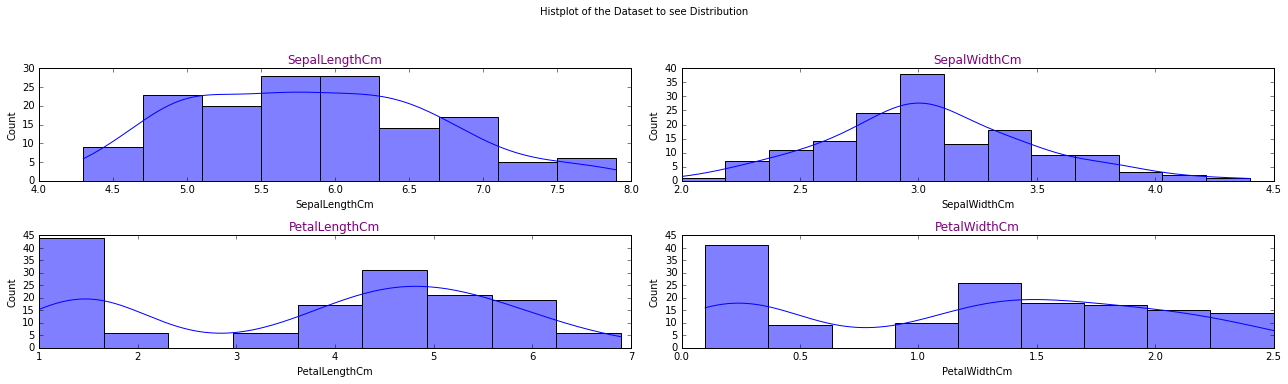

In [27]:
# Plotting Histplot to see if there are any outlier in any of the Columns

df1 = df.iloc[:,1:5]
fig=plt.figure(figsize=(18,7))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df1.shape[1]):
    ax=fig.add_subplot(3,2,i+1)
    sns.histplot(df1[df1.columns[i]], kde = True)
    ax.set_title(df1.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

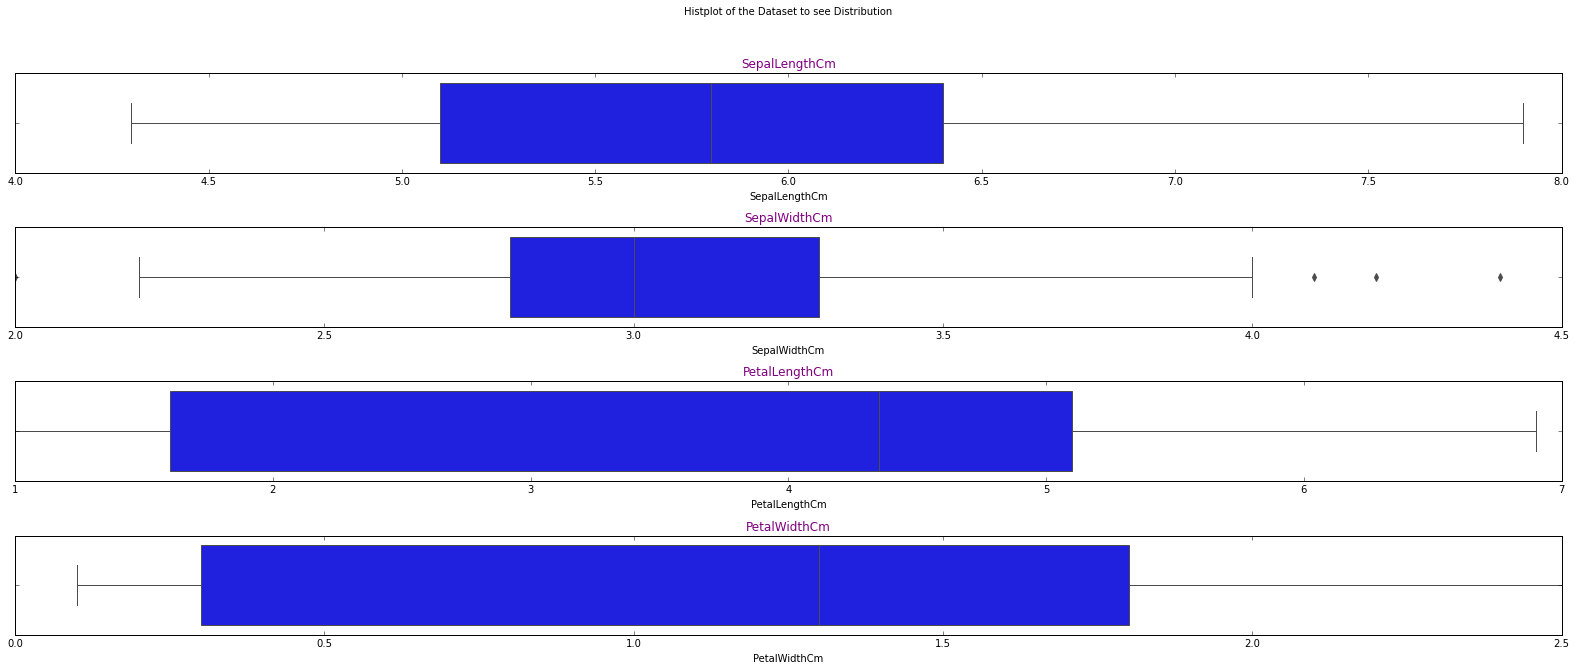

In [31]:
# Plotting Boxplot to see if there are any outlier in any of the Columns


fig=plt.figure(figsize=(22,9))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df1.shape[1]):
    ax=fig.add_subplot(4,1,i+1)
    sns.boxplot(df1[df1.columns[i]])
    ax.set_title(df1.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [ ]:
# No outlier present

#### Exploratory Data Analysis - Bivariate Analysis

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

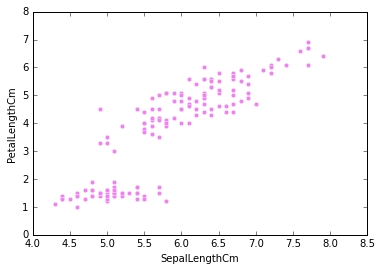

In [42]:
# Plotting Scatter plot to view the relation of above unique variables

sns.scatterplot( x= 'SepalLengthCm', y='PetalLengthCm', color = 'violet',data = df)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

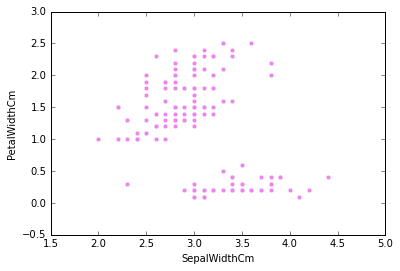

In [41]:
sns.scatterplot( x= 'SepalWidthCm', y='PetalWidthCm', color = 'violet',data = df)

In [93]:
# The Scatter plot shows positive correlation between the 2 variables

### Predicting Cluters using Hierarchical Clustering method

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
link_method = linkage(df1, method = 'average')

In [48]:
labelList = np.array(df.Species)
np.unique(labelList)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

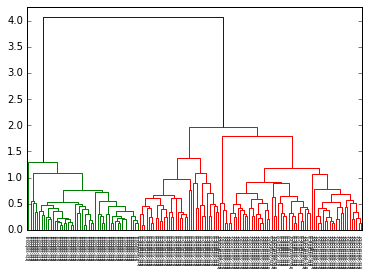

In [49]:
dend = dendrogram(link_method,labels = labelList)

#### Cutting the Dendrogram with suitable clusters

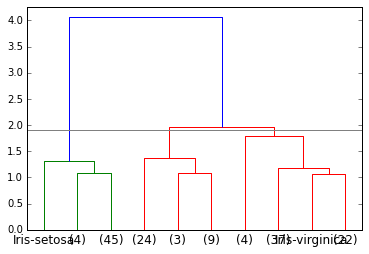

In [51]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )
plt.axhline(y=1.9, c='grey')

#### Importing fcluster module to create clusters

In [52]:
from scipy.cluster.hierarchy import fcluster

In [53]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [58]:
df['clusters'] = clusters

df.head()

In [57]:
df.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
130,131,7.4,2.8,6.1,1.9,Iris-virginica,2
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2
132,133,6.4,2.8,5.6,2.2,Iris-virginica,2
133,134,6.3,2.8,5.1,1.5,Iris-virginica,3
134,135,6.1,2.6,5.6,1.4,Iris-virginica,2
135,136,7.7,3.0,6.1,2.3,Iris-virginica,2
136,137,6.3,3.4,5.6,2.4,Iris-virginica,2
137,138,6.4,3.1,5.5,1.8,Iris-virginica,2
138,139,6.0,3.0,4.8,1.8,Iris-virginica,3
139,140,6.9,3.1,5.4,2.1,Iris-virginica,2


In [61]:
df['clusters'].value_counts()

3    64
1    50
2    36
Name: clusters, dtype: int64

#### Cluster Profiles

In [64]:
Profile_Info = df.iloc[:,1:7].groupby('clusters').mean()
Profile_Info['Frequency'] = df['clusters'].value_counts().sort_index()
Profile_Info

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Frequency
clusters,,,,,
1,5.006000,3.418000,1.464000,0.244000,50
2,6.852778,3.075000,5.786111,2.097222,36
3,5.929688,2.757813,4.410938,1.439063,64


 ### Predicting Cluters using K-Means Clustering Method

In [ ]:
#### Scaling the dataset 

In [69]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [67]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler


In [68]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [70]:
scaled_df = pd.DataFrame(X.fit_transform(df.iloc[:,1:5]),columns=df.columns[1:5])
scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Creating Clusters using KMeans

In [71]:
# Create K Means cluster and store the result in the object k_means, starting with K = 2
k_means = KMeans(n_clusters = 2,random_state=1)

In [72]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [73]:
# Get the labels
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Within Cluster Sum of Squares (WSS) to find out the optimum number of clusters

In [74]:
k_means.inertia_

223.73200573676343

In [ ]:
# Forming clusters with K = 1 to 11 and comparing the WSS using Elbow method

In [80]:
a = list(range(1,11))
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [75]:

wss =[]

In [76]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [77]:
wss

[600.0000000000003,
 223.73200573676343,
 140.96837895511072,
 114.61353859563565,
 91.07563926881433,
 80.23060704506956,
 72.45691763699084,
 62.871570419592096,
 54.67271260968229,
 47.75248512563785]

Text(0, 0.5, 'WSS')

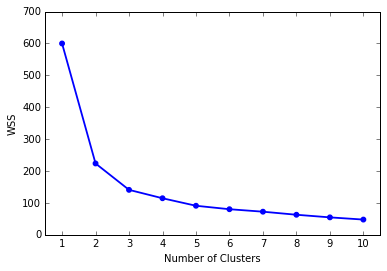

In [82]:
sns.pointplot(a, wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

In [94]:
# WSS shows the variability of the observations within each cluster. 
# The elbow method shows that after 3 clusters the within sum of squares do not have significant changes. So 3 clusters seems
# optimum. 

#### Cluster evaluation for 3 clusters using the silhouette score

In [83]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels_3 = k_means.labels_

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels_3,random_state=1)

0.45840087099074767

#### Cluster evaluation for 4 clusters using the silhouette score

In [87]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels_4 = k_means.labels_

In [88]:
silhouette_score(scaled_df,labels_4,random_state=1)

0.38911531839663555

#### Silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

#### Appending Clusters to the original dataset

In [89]:
df["Clus_kmeans3"] = labels_3
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans3
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Profiling of the Clusters

In [90]:
Profile_Info_kmeans = df.iloc[:,1:].groupby('Clus_kmeans3').mean()
Profile_Info_kmeans['Frequency'] = df['Clus_kmeans3'].value_counts().sort_index()
Profile_Info_kmeans

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Frequency
Clus_kmeans3,,,,,
0,5.006000,3.418000,1.464000,0.244000,50
1,5.786538,2.669231,4.365385,1.415385,52
2,6.777083,3.091667,5.491667,1.958333,48


In [ ]:
#### Plotting the Clusters

In [95]:
labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [97]:
label_clus_0 = df[labels_3==0]
label_clus_1 = df[labels_3==1]
label_clus_2 = df[labels_3==2]

In [98]:
cols = df.columns
cols

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Clus_kmeans3'],
      dtype='object')

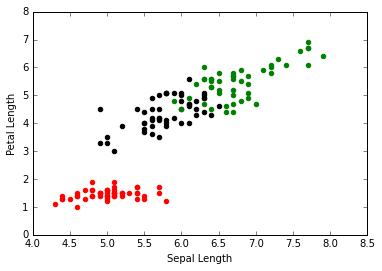

In [101]:
# Plotting with the variables SepalLength and PetalLength

plt.scatter(label_clus_0[cols[1]] , label_clus_0[cols[3]], color = 'red')
plt.scatter(label_clus_1[cols[1]] , label_clus_1[cols[3]], color = 'black')
plt.scatter(label_clus_2[cols[1]] , label_clus_2[cols[3]], color = 'green')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

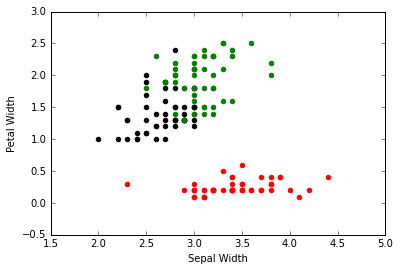

In [102]:
# Plotting with the variables SepalWidth and PetalWidth

plt.scatter(label_clus_0[cols[2]] , label_clus_0[cols[4]], color = 'red')
plt.scatter(label_clus_1[cols[2]] , label_clus_1[cols[4]], color = 'black')
plt.scatter(label_clus_2[cols[2]] , label_clus_2[cols[4]], color = 'green')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

In [92]:
#### Grouping the charactersitics of Species


Species_Info_kmeans = df.iloc[:,1:].groupby('Species').mean()
Species_Info_kmeans['Frequency'] = df['Species'].value_counts().sort_index()
Species_Info_kmeans


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clus_kmeans3,Frequency
Species,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.00,50
Iris-versicolor,5.936,2.770,4.260,1.326,1.24,50
Iris-virginica,6.588,2.974,5.552,2.026,1.72,50


### Insights

#### The Iris dataset can be clustered into 3 clusters, the parameters of the 3 clusters formed using K Means Clustering seems approximately similar to the characteristics of the 3 species. Also the number of clusters matched with the Hierarchical clustering method as well